In [1]:
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
import numpy as np
from pathlib import Path
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [17]:
trends_df = pd.read_csv("../../datasets/Median weekly rent.csv",  skiprows=1)
trends_df.rename(columns={'Unnamed: 0': 'Month'}, inplace=True)
trends_df.head()

,Month,NSW ($),VIC ($),Qld ($),SA ($),WA ($),TAS ($),NT ($),ACT ($)
0,Jun-18,490.0,375.0,380.0,320.0,350.0,270.0,450.0,470.0
1,Jul-18,490.0,380.0,380.0,320.0,350.0,265.0,450.0,470.0
2,Aug-18,490.0,380.0,380.0,320.0,350.0,270.0,450.0,465.0
3,Sep-18,490.0,385.0,375.0,320.0,350.0,265.0,450.0,465.0
4,Oct-18,480.0,380.0,375.0,320.0,350.0,270.0,450.0,470.0


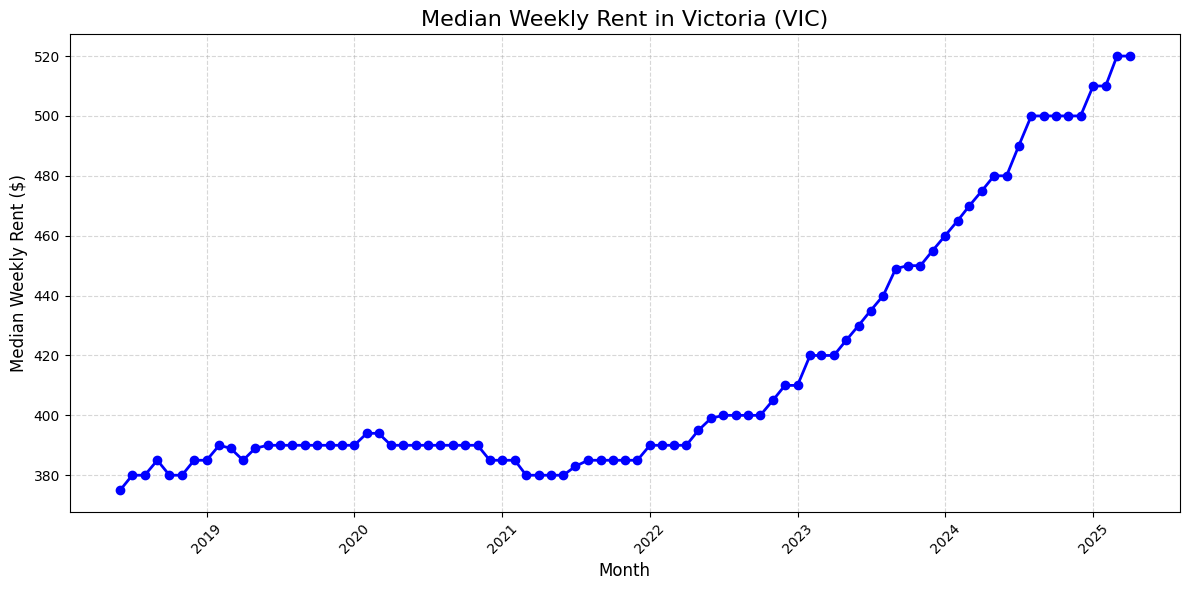

In [21]:
trends_df.rename(columns={'Unnamed: 0': 'Month'}, inplace=True)

# Keep only Month and VIC columns
df_vic = trends_df[['Month', 'VIC ($)']].copy()
df_vic.rename(columns={'VIC ($)': 'VIC'}, inplace=True)

# Convert Month to datetime
df_vic = df_vic[df_vic['Month'].str.match(r'^[A-Za-z]{3}-\d{2}$')]

# Convert Month to datetime
df_vic['Month'] = pd.to_datetime(df_vic['Month'], format='%b-%y')

# Plot VIC median rent
plt.figure(figsize=(12,6))
plt.plot(df_vic['Month'], df_vic['VIC'], marker='o', color='blue', linewidth=2)
plt.title('Median Weekly Rent in Victoria (VIC)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Median Weekly Rent ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

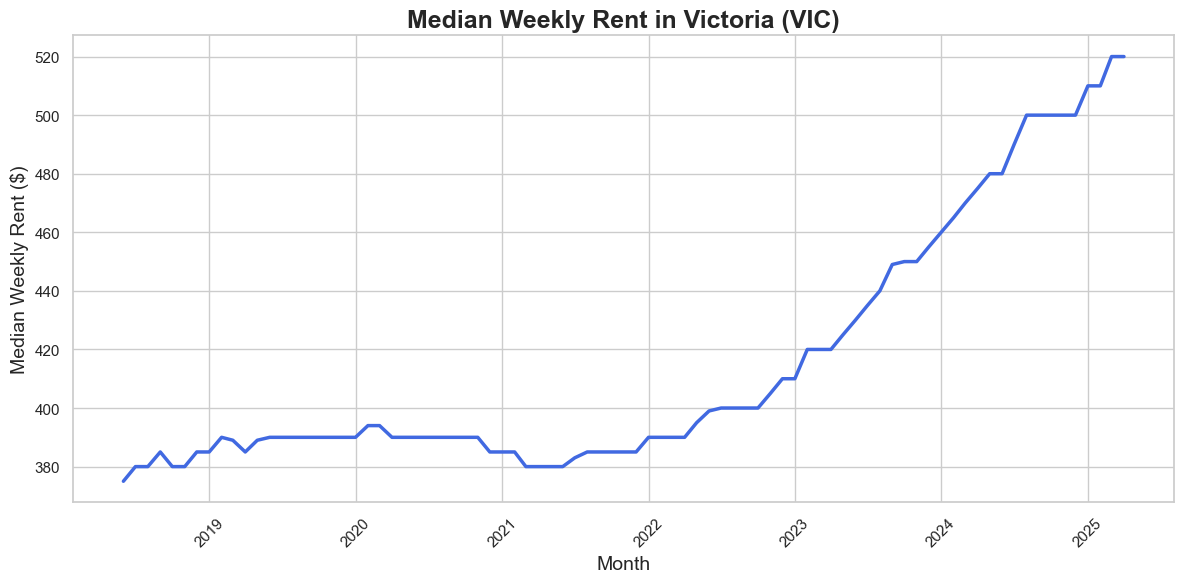

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")  # nicer grid
plt.figure(figsize=(12,6))

# Plot line without markers
sns.lineplot(data=df_vic, x='Month', y='VIC', color='royalblue', linewidth=2.5)

# Titles and labels
plt.title('Median Weekly Rent in Victoria (VIC)', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Median Weekly Rent ($)', fontsize=14)

# Improve x-axis formatting
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
df_since_2020 = df_vic[df_vic['Month'] >= '2020-01-01']

# Calculate total growth from first to last value
start_rent = df_since_2020['VIC'].iloc[0]
end_rent = df_since_2020['VIC'].iloc[-1]

total_growth_pct = ((end_rent - start_rent) / start_rent) * 100
print(f"Total growth since Jan 2020: {total_growth_pct:.1f}%")

Total growth since Jan 2020: 33.3%
